In [1]:
!pip install nltk


[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd

In [3]:
import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [4]:
from nltk.corpus import stopwords

stopwords.words('english')[0:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [5]:
import os

In [6]:
notebook_path = os.path.abspath("HW1.ipynb")

In [7]:
nlp_dataset = os.path.join(os.path.dirname(notebook_path), "socialmedia_relevant_cols.csv")

In [8]:
rawData = open(nlp_dataset).read()

In [9]:
rawData[0:500]

'text,choose_one,class_label\nJust happened a terrible car crash,Relevant,1\nOur Deeds are the Reason of this #earthquake May ALLAH Forgive us all,Relevant,1\n"Heard about #earthquake is different cities, stay safe everyone.",Relevant,1\n"there is a forest fire at spot pond, geese are fleeing across the street, I cannot save them all",Relevant,1\nForest fire near La Ronge Sask. Canada,Relevant,1\nAll residents asked to \'shelter in place\' are being notified by officers. No other evacuation or shelter in'

In [10]:
rawData = rawData.replace(';', '').split('\n')

In [11]:
print(len(rawData))

12251


In [13]:
rawData.pop(0)

'text,choose_one,class_label'

In [17]:
text = list()
choose_one = list()
class_label = list()

In [18]:
for i in range(len(rawData)):
    rawData[i] = rawData[i][::-1].replace(",", "\n", 2)[::-1]
    res = rawData[i].split('\n')
    if len(res) == 3:
        text.append(res[0])
        choose_one.append(res[1])
        class_label.append(res[2])
    if len(res) == 2:
        text.append(res[0])
        choose_one.append(res[1])
        class_label.append('')
    if len(res) == 1:
        text.append(res[0])
        choose_one.append('')
        class_label.append('')

In [19]:
fullCorpus = pd.DataFrame({
    'text' : text,
    'choose_one' : choose_one,
    'class_label' : class_label
})
fullCorpus

,text,choose_one,class_label
0,Just happened a terrible car crash,Relevant,1
1,Our Deeds are the Reason of this #earthquake M...,Relevant,1
2,"""Heard about #earthquake is different cities, ...",Relevant,1
3,"""there is a forest fire at spot pond, geese ar...",Relevant,1
4,Forest fire near La Ronge Sask. Canada,Relevant,1
...,...,...,...
12245,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,Relevant,1
12246,Police investigating after an e-bike collided ...,Relevant,1
12247,The Latest: More Homes Razed by Northern Calif...,Relevant,1
12248,MEG issues Hazardous Weather Outlook (HWO) htt...,Relevant,1


In [20]:
print("We have {} rows and {} columns in our dataset".format(len(fullCorpus), len(fullCorpus.columns)))

We have 12250 rows and 3 columns in our dataset


In [21]:
print(len(fullCorpus[fullCorpus['choose_one'] == 'Relevant']))

4673


In [22]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [23]:
def remove_punctuation(text):
    text_nopunct = "".join([char for char in text if char not in string.punctuation])
    return text_nopunct

fullCorpus['clean_text'] = fullCorpus['text'].apply(lambda x: remove_punctuation(x))
fullCorpus.head()

,text,choose_one,class_label,clean_text
0,Just happened a terrible car crash,Relevant,1,Just happened a terrible car crash
1,Our Deeds are the Reason of this #earthquake M...,Relevant,1,Our Deeds are the Reason of this earthquake Ma...
2,"""Heard about #earthquake is different cities, ...",Relevant,1,Heard about earthquake is different cities sta...
3,"""there is a forest fire at spot pond, geese ar...",Relevant,1,there is a forest fire at spot pond geese are ...
4,Forest fire near La Ronge Sask. Canada,Relevant,1,Forest fire near La Ronge Sask Canada


In [24]:
import re

In [25]:
def tokenise(text):
    tokens = re.split(r'\W+', text)
    return tokens

fullCorpus['tokenised_words'] = fullCorpus['clean_text'].apply(lambda x: tokenise(x.lower()))
fullCorpus.head()

,text,choose_one,class_label,clean_text,tokenised_words
0,Just happened a terrible car crash,Relevant,1,Just happened a terrible car crash,"[just, happened, a, terrible, car, crash]"
1,Our Deeds are the Reason of this #earthquake M...,Relevant,1,Our Deeds are the Reason of this earthquake Ma...,"[our, deeds, are, the, reason, of, this, earth..."
2,"""Heard about #earthquake is different cities, ...",Relevant,1,Heard about earthquake is different cities sta...,"[heard, about, earthquake, is, different, citi..."
3,"""there is a forest fire at spot pond, geese ar...",Relevant,1,there is a forest fire at spot pond geese are ...,"[there, is, a, forest, fire, at, spot, pond, g..."
4,Forest fire near La Ronge Sask. Canada,Relevant,1,Forest fire near La Ronge Sask Canada,"[forest, fire, near, la, ronge, sask, canada]"


In [26]:
stopword = nltk.corpus.stopwords.words('english')

def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text

fullCorpus['clean_text'] = fullCorpus['tokenised_words'].apply(lambda x: remove_stopwords(x))
fullCorpus.head()

,text,choose_one,class_label,clean_text,tokenised_words
0,Just happened a terrible car crash,Relevant,1,"[happened, terrible, car, crash]","[just, happened, a, terrible, car, crash]"
1,Our Deeds are the Reason of this #earthquake M...,Relevant,1,"[deeds, reason, earthquake, may, allah, forgiv...","[our, deeds, are, the, reason, of, this, earth..."
2,"""Heard about #earthquake is different cities, ...",Relevant,1,"[heard, earthquake, different, cities, stay, s...","[heard, about, earthquake, is, different, citi..."
3,"""there is a forest fire at spot pond, geese ar...",Relevant,1,"[forest, fire, spot, pond, geese, fleeing, acr...","[there, is, a, forest, fire, at, spot, pond, g..."
4,Forest fire near La Ronge Sask. Canada,Relevant,1,"[forest, fire, near, la, ronge, sask, canada]","[forest, fire, near, la, ronge, sask, canada]"


In [27]:
ps = nltk.PorterStemmer()

In [28]:
def stemming(tokenised_words):
    text = [ps.stem(word) for word in tokenised_words]
    return text

fullCorpus['text_stemmed']  = fullCorpus['clean_text'].apply(lambda x: stemming(x))
fullCorpus.head()

,text,choose_one,class_label,clean_text,tokenised_words,text_stemmed
0,Just happened a terrible car crash,Relevant,1,"[happened, terrible, car, crash]","[just, happened, a, terrible, car, crash]","[happen, terribl, car, crash]"
1,Our Deeds are the Reason of this #earthquake M...,Relevant,1,"[deeds, reason, earthquake, may, allah, forgiv...","[our, deeds, are, the, reason, of, this, earth...","[deed, reason, earthquak, may, allah, forgiv, us]"
2,"""Heard about #earthquake is different cities, ...",Relevant,1,"[heard, earthquake, different, cities, stay, s...","[heard, about, earthquake, is, different, citi...","[heard, earthquak, differ, citi, stay, safe, e..."
3,"""there is a forest fire at spot pond, geese ar...",Relevant,1,"[forest, fire, spot, pond, geese, fleeing, acr...","[there, is, a, forest, fire, at, spot, pond, g...","[forest, fire, spot, pond, gees, flee, across,..."
4,Forest fire near La Ronge Sask. Canada,Relevant,1,"[forest, fire, near, la, ronge, sask, canada]","[forest, fire, near, la, ronge, sask, canada]","[forest, fire, near, la, rong, sask, canada]"


In [29]:
wn = nltk.WordNetLemmatizer()

In [30]:
def lemmatizing(tokenised_words):
    text = [wn.lemmatize(word) for word in tokenised_words]
    return text

fullCorpus['text_lemmatized'] = fullCorpus['clean_text'].apply(lambda x: lemmatizing(x))
fullCorpus.head()

,text,choose_one,class_label,clean_text,tokenised_words,text_stemmed,text_lemmatized
0,Just happened a terrible car crash,Relevant,1,"[happened, terrible, car, crash]","[just, happened, a, terrible, car, crash]","[happen, terribl, car, crash]","[happened, terrible, car, crash]"
1,Our Deeds are the Reason of this #earthquake M...,Relevant,1,"[deeds, reason, earthquake, may, allah, forgiv...","[our, deeds, are, the, reason, of, this, earth...","[deed, reason, earthquak, may, allah, forgiv, us]","[deed, reason, earthquake, may, allah, forgive..."
2,"""Heard about #earthquake is different cities, ...",Relevant,1,"[heard, earthquake, different, cities, stay, s...","[heard, about, earthquake, is, different, citi...","[heard, earthquak, differ, citi, stay, safe, e...","[heard, earthquake, different, city, stay, saf..."
3,"""there is a forest fire at spot pond, geese ar...",Relevant,1,"[forest, fire, spot, pond, geese, fleeing, acr...","[there, is, a, forest, fire, at, spot, pond, g...","[forest, fire, spot, pond, gees, flee, across,...","[forest, fire, spot, pond, goose, fleeing, acr..."
4,Forest fire near La Ronge Sask. Canada,Relevant,1,"[forest, fire, near, la, ronge, sask, canada]","[forest, fire, near, la, ronge, sask, canada]","[forest, fire, near, la, rong, sask, canada]","[forest, fire, near, la, ronge, sask, canada]"


In [31]:
## сейчас в столбце clean_text находится токенизация по словам без стоп-слов

In [32]:
def tostr(clean_text):
    text = " ".join(clean_text)
    return text

fullCorpus['clean_text_full'] = fullCorpus['clean_text'].apply(lambda x: tostr(x))
fullCorpus.head()

,text,choose_one,class_label,clean_text,tokenised_words,text_stemmed,text_lemmatized,clean_text_full
0,Just happened a terrible car crash,Relevant,1,"[happened, terrible, car, crash]","[just, happened, a, terrible, car, crash]","[happen, terribl, car, crash]","[happened, terrible, car, crash]",happened terrible car crash
1,Our Deeds are the Reason of this #earthquake M...,Relevant,1,"[deeds, reason, earthquake, may, allah, forgiv...","[our, deeds, are, the, reason, of, this, earth...","[deed, reason, earthquak, may, allah, forgiv, us]","[deed, reason, earthquake, may, allah, forgive...",deeds reason earthquake may allah forgive us
2,"""Heard about #earthquake is different cities, ...",Relevant,1,"[heard, earthquake, different, cities, stay, s...","[heard, about, earthquake, is, different, citi...","[heard, earthquak, differ, citi, stay, safe, e...","[heard, earthquake, different, city, stay, saf...",heard earthquake different cities stay safe ev...
3,"""there is a forest fire at spot pond, geese ar...",Relevant,1,"[forest, fire, spot, pond, geese, fleeing, acr...","[there, is, a, forest, fire, at, spot, pond, g...","[forest, fire, spot, pond, gees, flee, across,...","[forest, fire, spot, pond, goose, fleeing, acr...",forest fire spot pond geese fleeing across str...
4,Forest fire near La Ronge Sask. Canada,Relevant,1,"[forest, fire, near, la, ronge, sask, canada]","[forest, fire, near, la, ronge, sask, canada]","[forest, fire, near, la, rong, sask, canada]","[forest, fire, near, la, ronge, sask, canada]",forest fire near la ronge sask canada


In [33]:
!pip install matplotlib


[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [34]:
!pip install seaborn


[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

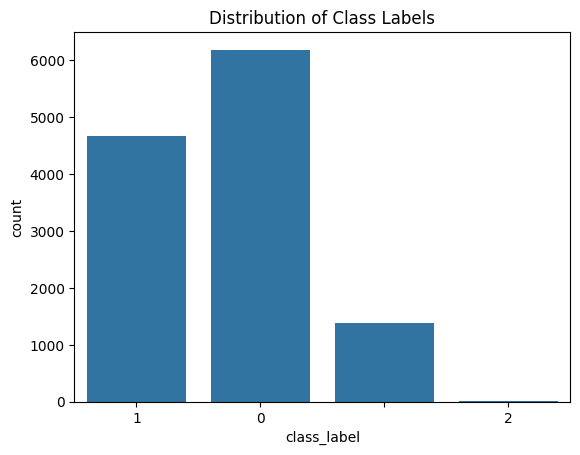

In [36]:
sns.countplot(x='class_label', data=fullCorpus)
plt.title('Distribution of Class Labels')
plt.show()

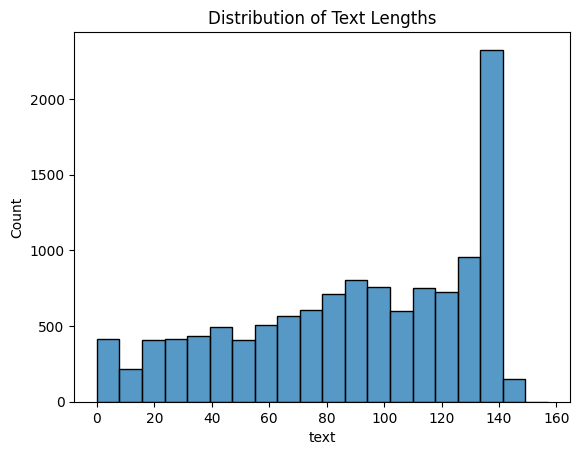

In [37]:
sns.histplot(fullCorpus['text'].apply(lambda x: len(x)), bins=20)
plt.title('Distribution of Text Lengths')
plt.show()

In [40]:
!pip install scikit-learn

     ---------------------------------------- 0.0/60.8 kB ? eta -:--:--
     ------ --------------------------------- 10.2/60.8 kB ? eta -:--:--
     ------------------- ------------------ 30.7/60.8 kB 660.6 kB/s eta 0:00:01
     -------------------------------------- 60.8/60.8 kB 543.3 kB/s eta 0:00:00
   ---------------------------------------- 0.0/10.9 MB ? eta -:--:--
   ---------------------------------------- 0.1/10.9 MB 2.3 MB/s eta 0:00:05
   ---------------------------------------- 0.1/10.9 MB 1.4 MB/s eta 0:00:08
    --------------------------------------- 0.2/10.9 MB 1.8 MB/s eta 0:00:07
   - -------------------------------------- 0.4/10.9 MB 2.1 MB/s eta 0:00:05
   - -------------------------------------- 0.5/10.9 MB 2.1 MB/s eta 0:00:05
   -- ------------------------------------- 0.7/10.9 MB 2.6 MB/s eta 0:00:04
   -- ------------------------------------- 0.7/10.9 MB 2.6 MB/s eta 0:00:04
   --- ------------------------------------ 1.0/10.9 MB 2.7 MB/s eta 0:00:04
   ---- -


[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [47]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

print("CountVectorizer:")
count_vectorizer = CountVectorizer()
count_matrix = count_vectorizer.fit_transform(fullCorpus['clean_text_full'])
print(count_matrix.toarray())
print("Vocabulary:", count_vectorizer.get_feature_names_out())


print("\nTfidfVectorizer:")
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(fullCorpus['clean_text_full'])
print(tfidf_matrix.toarray())
print("Vocabulary:", count_vectorizer.get_feature_names_out())

print(X_tfidf.shape)

CountVectorizer:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Vocabulary: ['00' '0011' '001116' ... 'ўthis' 'ўоѕdemolition' 'ўоѕnigeria']

TfidfVectorizer:
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Vocabulary: ['00' '0011' '001116' ... 'ўthis' 'ўоѕdemolition' 'ўоѕnigeria']
(12250, 28771)


In [50]:
X_tfidf_df = pd.DataFrame(tfidf_matrix.toarray())
X_tfidf_df.columns = tfidf_vectorizer.get_feature_names_out()
X_tfidf_df

,00,0011,001116,0025,005225,010156,010217,010242,0104,010401,...,щp,ьў,ќmy,ќnatasharideout,ќyeah,ўif,ўim,ўthis,ўоѕdemolition,ўоѕnigeria
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12245,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.432687,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12246,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12247,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12248,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
